# Dataset Normalization 

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
import numpy as np
from torch.utils.data import DataLoader
from torch.utils.data import Subset
import matplotlib.pylab as plt


In [2]:
train_set = torchvision.datasets.FashionMNIST(
    root='./data/FashionMNIST'
    , train=True
    , download=True
    , transform=transforms.Compose([
        transforms.ToTensor()
        # normalize
    ])
)

# 生成一个包含5000个随机索引的列表
indices = np.random.choice(len(train_set), 10000, replace=False)

# 创建子集
subset = Subset(train_set, indices)  ## 数据集太大，取一个subset,不然爆内存

# Easy way

In [3]:
# loader = DataLoader(train_set, batch_size=len(train_set), num_workers=1)
loader = DataLoader(subset, batch_size=len(subset), num_workers=1)
data = next(iter(loader))
data[0].mean(), data[0].std()

(tensor(0.2859), tensor(0.3530))

# Hard way

In [4]:
loader = DataLoader(subset, batch_size=500, num_workers=1)
num_of_pixel = len(subset) * 28 * 28

total_sum = 0
for batch in loader: total_sum += batch[0].sum()
mean = total_sum / num_of_pixel

sum_of_squared_error = 0
for batch in loader: sum_of_squared_error += ((batch[0] - mean).pow(2)).sum()
std = torch.sqrt(sum_of_squared_error / num_of_pixel)

mean, std

(tensor(0.2859), tensor(0.3530))

# Plotting the Values

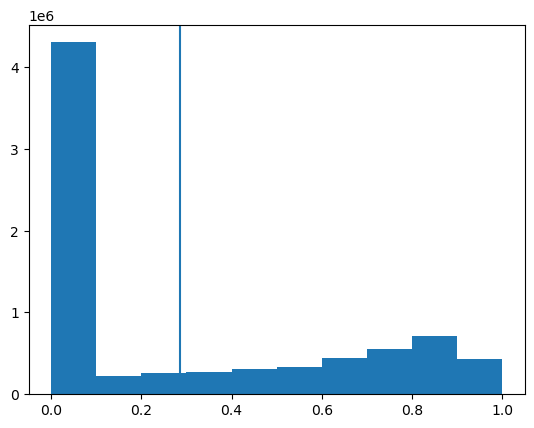

In [5]:
plt.hist(data[0].flatten())  ## 数据集太大，取一个subset,不然爆内存
plt.axvline(mean)

# Using the mean and std values

## Note that we use the same mean and std values for training, validation, and testing 

In [9]:
train_set_normal = torchvision.datasets.FashionMNIST(
    root='./data'
    , train=True
    , download=True
    , transform=transforms.Compose([
        transforms.ToTensor()
        , transforms.Normalize(mean, std)
    ])
)

100.0%


Extracting ./data\FashionMNIST\raw\train-images-idx3-ubyte.gz to ./data\FashionMNIST\raw



100.0%


Extracting ./data\FashionMNIST\raw\train-labels-idx1-ubyte.gz to ./data\FashionMNIST\raw



100.0%


Extracting ./data\FashionMNIST\raw\t10k-images-idx3-ubyte.gz to ./data\FashionMNIST\raw



100.0%

Extracting ./data\FashionMNIST\raw\t10k-labels-idx1-ubyte.gz to ./data\FashionMNIST\raw
